# Assignment 1

**Assignment 1: Optimization**

**Goal**: ​Get familiar with gradient-based and derivative-free optimization by implementing these methods and applying them to a given function.

In this assignment we are going to learn about **gradient-based** (GD) optimization methods and **derivative-free optimization** (DFO) methods. The goal is to implement these methods (one from each group) and analyze their behavior. Importantly, we aim at noticing differences between these two groups of methods.

Here, we are interested in ​minimizing​ the following function:

$$
f(\mathbf{x})=x_{1}^{2}+2 x_{2}^{2}-0.3 \cos \left(3 \pi x_{1}\right)-0.4 \cos \left(4 \pi x_{2}\right)+0.7
$$

in the domain $\mathbf{x} = (x_1, x_2) \in [-100, 100]^{2}$ (i.e., $x_1 \in [-100, 100]$, $x_2 \in [-100, 100]$).

In this assignemnt, you are asked to implement:
1. The gradient-descent algorithm.
2. A chosen derivative-free algorithm. *You are free to choose a method.*

After implementing both methods, please run experiments and compare both methods. Please find a more detailed description below.

## 1. Understanding the objective

Please run the code below and visualize the objective function. Please try to understand the objective function, what is the optimum (you can do it by inspecting the plot).

If any code line is unclear to you, please read on that in numpy or matplotlib docs.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# PLEASE DO NOT REMOVE!
# The objective function.
def f(x):
    return (
        x[:, 0] ** 2
        + 2 * x[:, 1] ** 2
        - 0.3 * np.cos(3.0 * np.pi * x[:, 0])
        - 0.4 * np.cos(4.0 * np.pi * x[:, 1])
        + 0.7
    )

In [5]:
# PLEASE DO NOT REMOVE!
# Calculating the objective for visualization.
def calculate_f(x1, x2):
    f_x = []
    for i in range(len(x1)):
        for j in range(len(x2)):
            f_x.append(f(np.asarray([[x1[i], x2[j]]])))

    return np.asarray(f_x).reshape(len(x1), len(x2))

In [6]:
# PLEASE DO NOT REMOVE!
# Define coordinates
x1 = np.linspace(-100.0, 100.0, 400)
x2 = np.linspace(-100.0, 100.0, 400)

# Calculate the objective
f_x = calculate_f(x1, x2).reshape(len(x1), len(x2))

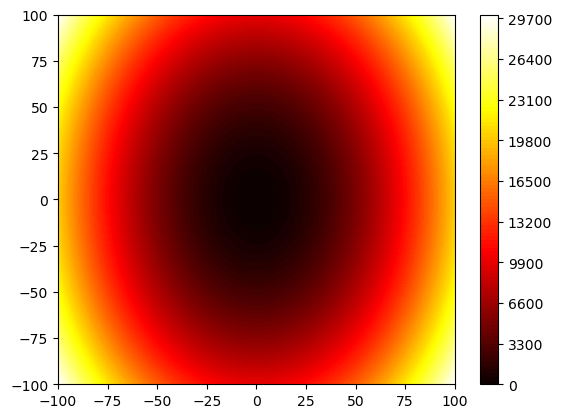

In [7]:
# PLEASE DO NOT REMOVE!
# Plot the objective
plt.contourf(x1, x2, f_x, 100, cmap="hot")
plt.colorbar()

## 2. The gradient-descent algorithm

First, you are asked to implement the gradient descent (GD) algorithm. Please take a look at the class below and fill in the missing parts.

NOTE: Please pay attention to the inputs and outputs of each function.

NOTE: To implement the GD algorithm, we need a gradient with respect to $\mathbf{x}$ of the given function. Please calculate it on a paper and provide the solution below. Then, implement it in an appropriate function that will be further passed to the GD class.

**Question 1 (0-1pt):** What is the gradient of the function $f(\mathbf{x})$? Please fill below both the mathematical expression and within the code.

**Answer:**
\begin{align*}
\nabla_{\mathbf{x}_1} f(\mathbf{x}) &= 2x_1-0.9π*sin(3πx_1)  \textbf{ (0.15 pt)}\\
\nabla_{\mathbf{x}_2} f(\mathbf{x}) &= 4x_2-1.6π*sin(4πx_2)  \textbf{ (0.15 pt)}\\
\end{align*}


In [8]:
# =========
# GRADING:
# 0
# 0.5pt - if properly implemented and commented well
# =========
# Implement the gradient for the considered f(x).
def grad(x):
    x_1=x[:, 0]    #first component of the vector x.
    x_2=x[:, 1]    #second component of the vector x.
    dx_1=2*x_1-0.9*np.pi*np.sin(3*np.pi*x_1)    #derivative of the first component of the vector x.
    dx_2=4*x_2-1.6*np.pi*np.sin(4*np.pi*x_2)    #derivative of the second component of the vector x.
    grad = np.column_stack((dx_1,dx_2))    #stacking the derivatives of the components of the vector x. 
    return grad

In [9]:
# =========
# GRADING:
# 0
# 0.5pt if properly implemented and commented well
# =========
# Implement the gradient descent (GD) optimization algorithm.
# It is equivalent to implementing the step function.
class GradientDescent(object):
    def __init__(self, grad, step_size=0.1):
        self.grad = grad
        self.step_size = step_size

    def step(self, x_old):
        gradient=self.grad(x_old)    #calculating the gradient of the function at the point x_old.
        # PLEASE FILL IN:
        x_new=x_old-self.step_size*gradient  #updating the point x_old to x_new using the gradient descent algorithm.
        # ------
        return x_new

In [10]:
# PLEASE DO NOT REMOVE!
# An auxiliary function for plotting.
def plot_optimization_process(ax, optimizer, title):
    # Plot the objective function
    ax.contourf(x1, x2, f_x, 100, cmap="hot")

    # Init the solution
    x = np.asarray([[90.0, -90.0]])
    x_opt = x
    # Run the optimization algorithm
    for i in range(num_epochs):
        x = optimizer.step(x)
        x_opt = np.concatenate((x_opt, x), 0)

    ax.plot(x_opt[:, 0], x_opt[:, 1], linewidth=3.0)
    ax.set_title(title)

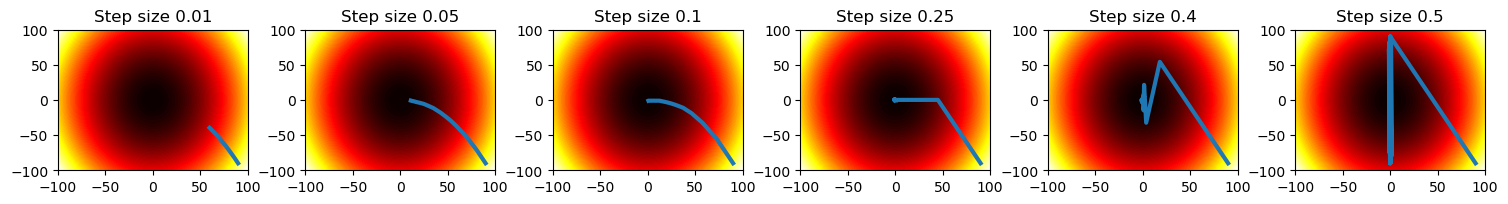

In [11]:
# PLEASE DO NOT REMOVE!
# This piece of code serves for the analysis.
# Running the GD algorithm with different step sizes
num_epochs = 20  # the number of epochs
step_sizes = [0.01, 0.05, 0.1, 0.25, 0.4, 0.5]  # the step sizes

# plotting the convergence of the GD
fig_gd, axs = plt.subplots(1, len(step_sizes), figsize=(15, 2))
fig_gd.tight_layout()

for i in range(len(step_sizes)):
    # take the step size
    step_size = step_sizes[i]
    # init the GD
    gd = GradientDescent(grad, step_size=step_size)
    # plot the convergence
    plot_optimization_process(
        axs[i], optimizer=gd, title="Step size " + str(gd.step_size)
    )

**Question 2 (0-0.5pt)**: Please analyze the plots above and comment on the behavior of the gradient-descent for different values of the step size. What happens in the small and large step sizes and what is the optimum step size?

**Answer**: 
- In small step sizes, the graph is slow to converge, especially in the areas that contain steep gradience. 
- In large step sizes, the graph doesn't converge properly. The gradient goes all over the place swiftly because of the high step size.

The optimum step size seems to be 0.1 because of how controlled and properly executed the graph looks. It is not as slow to converge but doesn't go all over the place like its successors (0.25 and above) either.


**Question 3 (0-0.5pt)**: How can we improve the convergence when the step size equals 0.01? What about when the step size equals 0.5?

**Answer**: When the step size is 0.01, the convergence is really slow. Because of the slow convergence, the step size should be increased to improve the convergence. Similarly, when the step size is 0.5, because of the rapid and random movement, the step size should be decreased to improve the convergence.

## 3. The derivative-free optimization

In the second part of this assignment, you are asked to implement a derivative-free optimziation (DFO) algorithm. Please notice that you are free to choose any DFO method you wish.
Moreover, you are encouraged to be as imaginative as possible! Do you have an idea for a new method or combine multiple methods? Great!

**Question 4 (0-0.5-1-1.5-2-2.5-3pt)**: Please provide a description (a pseudocode) of your DFO method here.

*NOTE (grading): Please keep in mind: start simple, make sure your approach works. You are encouraged to use your creativity and develop more complex approaches that will influence the grading. TAs will also check whether the pseudocode is correct.*

**Answer:** This code is the derivative-free optimization using the Hill Climbing Method.

*Input:* objective function obj_fun, initial step size step_size, radius of the search space.

1. Evaluate the objective function at the current solution x_old to get the current objective value (current_values).
2. We genarate a list of current_neighbors, for i from 1 to number_neighbors, and generate a random neighbor within the search space around x_old.
3. We then evaluate the objective function for each neighbor to get neighbor_vals.
4. After that, we find the index of the best neighbor with the lowest objective value (best_neighbor_index).
5. we get the value of the best neighbor (best_neighbor_val).
6. If anything else is the case, we keep x_current unchanged.
7. If the objective value of the best neighbor is less than or equal to the current objective value, and we update the solution to the best neighbor, otherwise, we keep the current solution (x_new=x_old)
8. Finally, we return the updated solution x_new.

In [31]:
# =========
# GRADING: 0-0.5-1-1.5-2pt
# 0
# 0.5pt the code works but it is very messy and unclear
# 1.0pt the code works but it is messy and badly commented
# 1.5pt the code works but it is hard to follow in some places
# 2.0pt the code works and it is fully understandable
# =========
# Implement a derivative-free optimization (DFO) algorithm.
# REMARK: during the init, you are supposed to pass the obj_fun and other objects that are necessary in your method.
class DFO(object):
    def __init__(self, obj_fun, step_size, radius, scaling_factor=1):
        self.obj_fun = obj_fun # Objective function
        self.step_size = step_size # Step size
        self.radius = radius # Radius
        self.number_neighbors = int(2 * np.pi * radius / step_size * scaling_factor)

    def step(self, x_old): # Perform a single step of the optimization algorithm
        current_values = self.obj_fun(x_old)  # Compute the value at the current solution
        current_neighbors = [x_old + np.random.uniform(-self.step_size, self.step_size, size=x_old.shape) for _ in range(self.number_neighbors)] # Generate neighboring solutions
        neighbor_vals = [self.obj_fun(neighbor) for neighbor in current_neighbors] # Compute the values of the neighbors
        best_neighbor_index = np.argmin(neighbor_vals) # Find the best neighbor
        best_neighbor_val = neighbor_vals[best_neighbor_index] # Find the value of the best neighbor

        if best_neighbor_val <= current_values:  # If the best neighbor is better
            x_new = current_neighbors[best_neighbor_index]  # Update the solution to the best neighbor
        else:
            x_new = x_old  # Otherwise, keep the solution as it is

        return x_new  # Return the updated solution

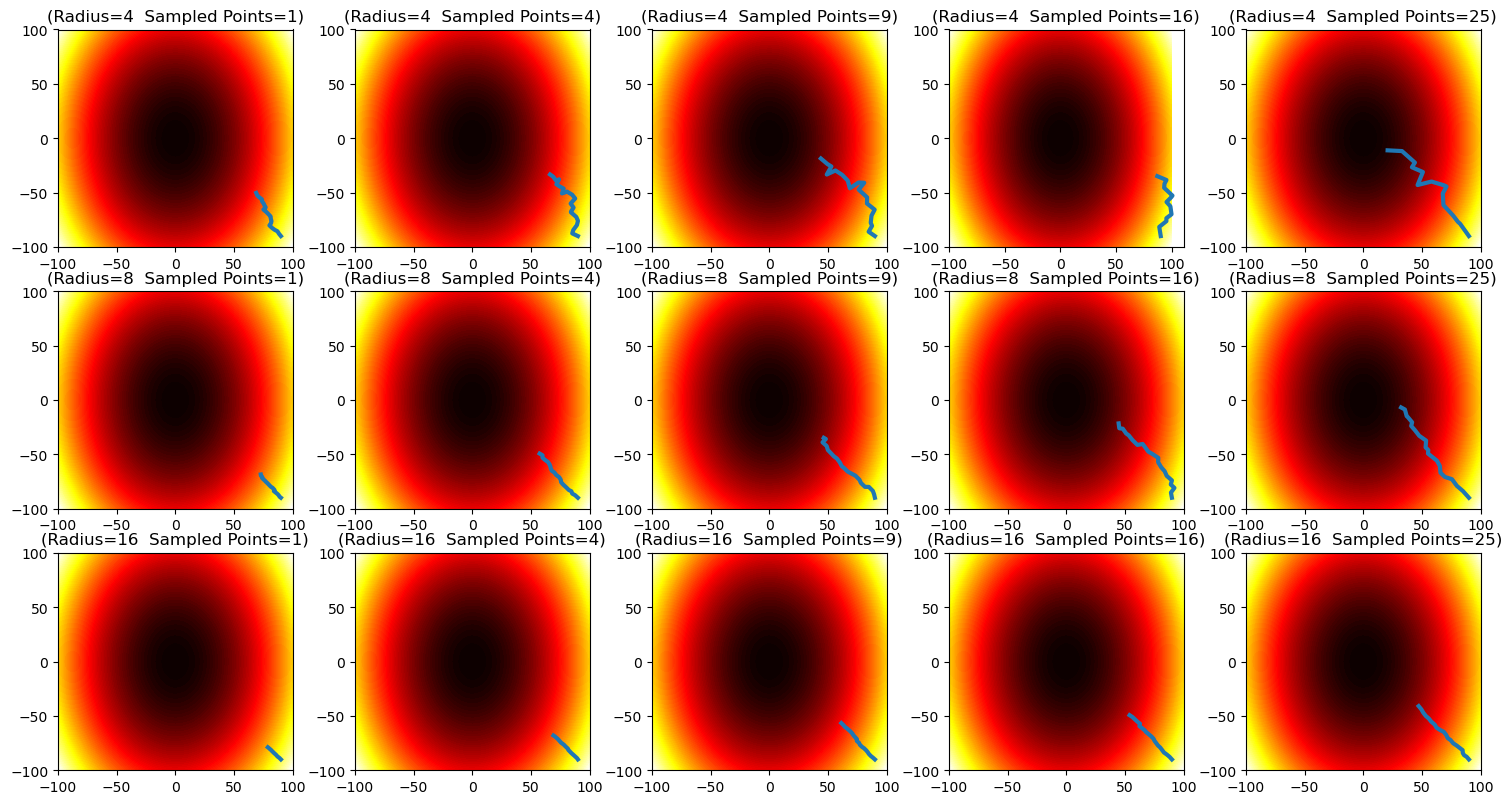

In [32]:
# Running the DFO algorithm with different step sizes
radii = [4, 8, 16] # the radii
samp_pts = [1, 4, 9, 16, 25] # the sampled points
scaling_factor = 10

fig_dfo, axs = plt.subplots(len(radii), len(samp_pts), figsize=(15, 8)) #plotting the convergence of the DFO
fig_dfo.tight_layout() #setting the layout of the plot.
for i, radius in enumerate(radii):
    for j, sampled_point in enumerate(samp_pts):
        step_size = scaling_factor*np.sqrt(sampled_point) / radius # calculating step size based on radius and sampled points
        dfo = DFO(obj_fun=f, step_size=step_size, radius=radius) # Initializing the DFO algorithm with radius.
        plot_optimization_process(axs[i, j], optimizer=dfo, title=f"(Radius={radius}  Sampled Points={sampled_point})") #plotting the convergence of the DFO algorithm.

**Question 5 (0-0.5-1pt)** Please comment on the behavior of your DFO algorithm. What are the strong points? What are the (potential) weak points? During working on the algorithm, what kind of problems did you encounter?

**Answer:** The algorithm uses The Hill Climbing approach. The benefit of this is, there is no need for derivatives, firstly. Secondly, The algorithm is flexible in terms of the number of neihbors it considers for each step which is determined by the radius and step size. Thus, it is very flexible. There also a few weak points, first being the DFO algoirthm can get stuck int he local minima. Also, the performance of the algorithm is heavinly dependent on the choice of parameters, here being the step sizes and the radii.

## 4. Final remarks: GD vs. DFO

Eventually, please answer the following last question that will allow you to conclude the assignment draw conclusions.

**Question 6 (0-0.5pt)**: What are differences between the two approaches?

**Answer**: The most significant difference I saw was that the GD uses derivative information to guide the search while DFO does not do that. Thus, GD can be more efficient in many cases, however it also could mean that the GF can only be used on problems where the derivative is defined and can be calculated easily.

**Question 7 (0-0.5)**: Which of the is easier to apply? Why? In what situations? Which of them is easier to implement in general?

**Answer**: I felt like in general, GD is simpler and more straightforward. It is easy to understand and compute, but knowledge of calculus is necessary in it. On the other hand, I felt like DFO was tougher to implement, although no knowledge of calculus is required. The GD is easier to apply when the objective function is smooth. DFO is easier to apply when the function is discontinuous. 